In [1]:
from vdna import VDNAProcessor, EMD, load_vdna_from_files
import torch
import time
import matplotlib.pyplot as plt
import os

c:\Users\sumal\anaconda3\envs\temp_project\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
xFormers not available
xFormers not available


In [2]:
vdna_proc = VDNAProcessor()
device = torch.device('cpu')
device = "cuda:0" if torch.cuda.is_available() else "cpu"
print(device)

cityscapes = "dataset/Cityscapes/leftImg8bit/train/bochum"
kitti_360 = "KITTI-360/data_2d_raw/2013_05_28_drive_0000_sync/image_00/data_rect"

vdna_cityscapes = vdna_proc.make_vdna(source=cityscapes, device=device, num_workers=0, feat_extractor_name="dinov2_base_224")
vdna_cityscapes.save("C:/09_Master_Program/Uni_Freiburg/Summer_2024/01_DL_lab/Project/Cityscapes/VisualDNA/output/vdna_cityscapes")
results = []

cuda:0
Found 96 images in the provided source
Using 96 images


  0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:19<00:00,  9.84s/it]


In [3]:
cityscapes_base_path = "dataset/Cityscapes/leftImg8bit/train"
kitti_360 = "KITTI-360/data_2d_raw/2013_05_28_drive_0000_sync/image_00/data_rect"

# Get all city directories at the same level as aachen, bochum, etc.
city_dirs = [os.path.join(cityscapes_base_path, city) for city in os.listdir(cityscapes_base_path) if os.path.isdir(os.path.join(cityscapes_base_path, city))]

# Collect all image paths from all city directories
all_image_paths = []
for city in city_dirs:
    for root, _, files in os.walk(city):
        for file in files:
            if file.endswith(".png"):  # Assuming images are in PNG format
                all_image_paths.append(os.path.join(root, file))

# Process all images collectively
vdna_cityscapes = vdna_proc.make_vdna(source=all_image_paths, device=device, num_workers=0, feat_extractor_name="dinov2_small_224")
vdna_cityscapes.save("C:/09_Master_Program/Uni_Freiburg/Summer_2024/01_DL_lab/Project/Cityscapes/VisualDNA/output/vdna_cityscapes")

results = []

Found 2975 images in the provided source
Using 2975 images


  0%|          | 0/47 [00:00<?, ?it/s]

100%|██████████| 47/47 [08:04<00:00, 10.31s/it]


In [4]:
import os
vdna_proc = VDNAProcessor()
device = torch.device('cpu')
device = "cuda:0" if torch.cuda.is_available() else "cpu"

# Configuration dictionary to manage paths
config = {
    "cityscapes_base_path": "dataset/Cityscapes/leftImg8bit/train",
    "kitti_360_base_path": "dataset/KITTI-360/data_2d_raw/2013_05_28_drive_0000_sync/image_00/data_rect",
    "vdna_output_path": "output/vdna_cityscapes"
}

# Ensure paths exist
for key, path in config.items():
    if not os.path.exists(path):
        raise FileNotFoundError(f"Path for {key} does not exist: {path}")

# Get all city directories at the same level as aachen, bochum, etc.
cityscapes_base_path = config["cityscapes_base_path"]
city_dirs = [os.path.join(cityscapes_base_path, city) for city in os.listdir(cityscapes_base_path) if os.path.isdir(os.path.join(cityscapes_base_path, city))]

# Collect all image paths from all city directories
all_image_paths = []
for city in city_dirs:
    for root, _, files in os.walk(city):
        for file in files:
            if file.endswith(".png"):  # Assuming images are in PNG format
                all_image_paths.append(os.path.join(root, file))

# Process all images collectively
vdna_cityscapes = vdna_proc.make_vdna(source=all_image_paths, device=device, num_workers=0, feat_extractor_name="dinov2_small_224")

# Ensure output directory exists
output_path = config["vdna_output_path"]
os.makedirs(os.path.dirname(output_path), exist_ok=True)

# Save the results
vdna_cityscapes.save(output_path)

results = []

Found 2975 images in the provided source
Using 2975 images


  0%|          | 0/47 [00:00<?, ?it/s]

100%|██████████| 47/47 [07:52<00:00, 10.05s/it]


FileNotFoundError: [WinError 3] The system cannot find the path specified: ''

In [17]:
import json

# Configuration dictionary to manage paths
config = {
    "cityscapes_base_path": "dataset/Cityscapes/leftImg8bit/train",
    "kitti_360_base_path": "dataset/KITTI-360/data_2d_raw",
    "vdna_output_path": "output/vdna_cityscapes",
    "results_json_path": "output/results.json"
}
# Process KITTI-360 images and compute EMD
results = []
kitti_360_base_path = config["kitti_360_base_path"]
count = 0


for image in os.listdir(kitti_360_base_path):
    image_path = os.path.join(kitti_360_base_path, image)
    vdna_kitti = vdna_proc.make_vdna(source=image_path, device=device, num_workers=0, feat_extractor_name="dinov2_small_224")
    emd = EMD(vdna_cityscapes, vdna_kitti)
    
    # Convert tensor to list or float
    if isinstance(emd, torch.Tensor):
        emd = emd.tolist()  # Convert tensor to list
    elif isinstance(emd, (int, float)):
        emd = float(emd)  # Convert int/float to float

    data = {"image": image_path, "emd": emd}
    results.append(data)
    count += 1
    if count == 20:
        break

results = sorted(results, key=lambda x: x['emd'])

# Save the results to a JSON file
results_json_path = config["results_json_path"]
os.makedirs(os.path.dirname(results_json_path), exist_ok=True)

with open(results_json_path, 'w') as json_file:
    json.dump(results, json_file, indent=4)

Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.21it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.35it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.14it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.38it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.37it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.23it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.37it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.16it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.34it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.37it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.22it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.24it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.23it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.11it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.19it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.18it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.29it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.15it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.30it/s]


In [41]:
import json

results = []

config = {
    "cityscapes_base_path": "dataset/Cityscapes/leftImg8bit/train",
    "kitti_360_base_path": "dataset/KITTI-360/data_2d_raw",
    "vdna_output_path": "output/vdna_cityscapes",
    "results_json_path": "output/results.json"
}

kitti_360_base_path = config["kitti_360_base_path"]
for root, _, files in os.walk(kitti_360_base_path):
    count = 0
    if 'image_00\data_rect' in root:
        for file in files:
            if file.endswith(".png"):  # Assuming images are in PNG format
                image_path = os.path.join(root, file)
                vdna_kitti = vdna_proc.make_vdna(source=image_path, device=device, num_workers=0, feat_extractor_name="dinov2_small_224")
                emd = EMD(vdna_cityscapes, vdna_kitti)
                
                # Convert tensor to list or float
                if isinstance(emd, torch.Tensor):
                    emd = emd.tolist()  # Convert tensor to list
                elif isinstance(emd, (int, float)):
                    emd = float(emd)  # Convert int/float to float
                
                data = {"image": image_path, "emd": emd}
                
                results.append(data)
                count += 1
            if count == 20:
                break
        

results = sorted(results, key=lambda x: x['emd'])

# Save the results to a JSON file
results_json_path = config["results_json_path"]
os.makedirs(os.path.dirname(results_json_path), exist_ok=True)

with open(results_json_path, 'w') as json_file:
    json.dump(results, json_file, indent=4)


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.23it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.48it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.35it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.45it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.37it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.12it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.45it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.42it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.14it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.37it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.24it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.37it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.42it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.22it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.41it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.36it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.31it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.23it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.22it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.38it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.22it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.35it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.25it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.39it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.25it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.39it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.29it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.39it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.23it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.33it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.21it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.38it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.33it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.22it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.35it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.21it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.42it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.17it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.38it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.23it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.34it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.37it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.21it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.33it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.33it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.21it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.31it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.21it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.21it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.20it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.37it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.18it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.23it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.35it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.20it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.41it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.21it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.33it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.18it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.35it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.20it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.35it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.33it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.34it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.13it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.33it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.20it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.37it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.24it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.35it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.38it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.18it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.40it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.20it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.22it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.17it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.36it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.23it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.18it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.27it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.20it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.27it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.33it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.21it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.27it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.34it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.22it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.25it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.25it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.11it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.34it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.05it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.30it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.11it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.30it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.36it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.18it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.31it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.19it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.34it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.25it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.35it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.13it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.33it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.20it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.27it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.40it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.21it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.20it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.07it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.23it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.18it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.36it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.25it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.33it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.30it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.22it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.36it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.21it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.33it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.22it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.29it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.31it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.33it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.31it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.23it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.27it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.18it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.27it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.20it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.36it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.33it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.31it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.20it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.33it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.19it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.38it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.18it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.35it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.31it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.19it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.31it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.20it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.35it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.13it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.13it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.33it/s]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.18it/s]


In [49]:
results = []
count = 0
for image in os.listdir(kitti_360):
    try:
        vdna_kitti = vdna_proc.make_vdna(source=kitti_360 + '/' + image, device=device, num_workers=0, feat_extractor_name="dinov2_base_224")
        emd = EMD(vdna_cityscapes, vdna_kitti)
        data = {"image": image, "emd": emd} 
        results.append(data)
        # print(f"Image: {image}, EMD: {emd}")
        count = count + 1
        if count == 20:
            break
    except Exception as e:
        print(f"Error: {e}")

Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:01<00:00,  1.70s/it]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:01<00:00,  1.78s/it]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:01<00:00,  1.78s/it]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:01<00:00,  1.92s/it]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:01<00:00,  1.76s/it]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:01<00:00,  1.88s/it]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:01<00:00,  1.64s/it]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:01<00:00,  1.82s/it]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:01<00:00,  1.79s/it]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:01<00:00,  1.68s/it]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:01<00:00,  1.67s/it]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:01<00:00,  1.77s/it]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:01<00:00,  1.63s/it]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:01<00:00,  1.66s/it]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:01<00:00,  1.86s/it]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:01<00:00,  1.90s/it]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:01<00:00,  1.87s/it]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:01<00:00,  1.88s/it]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:01<00:00,  1.64s/it]


Found 1 images in the provided source
Using 1 images


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:01<00:00,  1.76s/it]


In [50]:
results = sorted(results, key=lambda x: x['emd'])

In [52]:
count = 0
for i in results:
    count += 1
    print(i['image'], i['emd'])
    

0000000090.png tensor(10.1945, device='cuda:0', dtype=torch.float64)
0000000095.png tensor(10.2394, device='cuda:0', dtype=torch.float64)
0000000085.png tensor(10.3585, device='cuda:0', dtype=torch.float64)
0000000080.png tensor(10.6286, device='cuda:0', dtype=torch.float64)
0000000075.png tensor(10.8660, device='cuda:0', dtype=torch.float64)
0000000070.png tensor(11.1782, device='cuda:0', dtype=torch.float64)
0000000065.png tensor(11.1861, device='cuda:0', dtype=torch.float64)
0000000060.png tensor(11.3211, device='cuda:0', dtype=torch.float64)
0000000055.png tensor(11.4852, device='cuda:0', dtype=torch.float64)
0000000050.png tensor(11.5004, device='cuda:0', dtype=torch.float64)
0000000035.png tensor(11.5715, device='cuda:0', dtype=torch.float64)
0000000040.png tensor(11.5838, device='cuda:0', dtype=torch.float64)
0000000045.png tensor(11.6185, device='cuda:0', dtype=torch.float64)
0000000030.png tensor(11.6191, device='cuda:0', dtype=torch.float64)
0000000015.png tensor(11.7522, dev

0000000090.png tensor(10.1945, device='cuda:0', dtype=torch.float64)


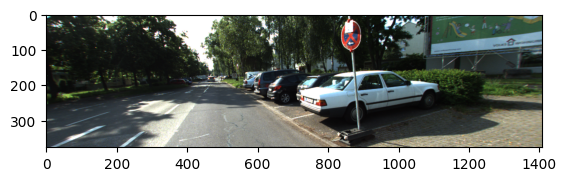

0000000095.png tensor(10.2394, device='cuda:0', dtype=torch.float64)


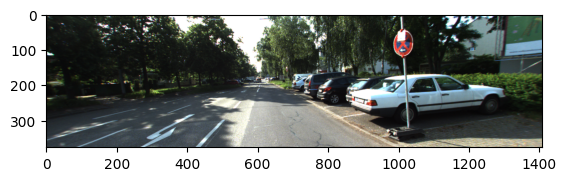

0000000085.png tensor(10.3585, device='cuda:0', dtype=torch.float64)


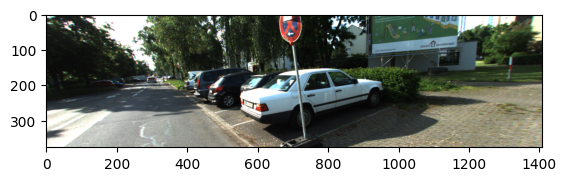

0000000080.png tensor(10.6286, device='cuda:0', dtype=torch.float64)


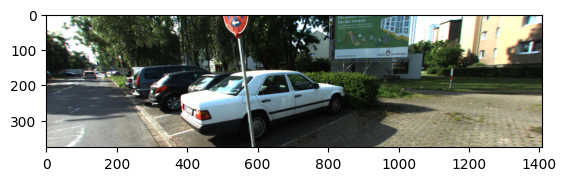

0000000075.png tensor(10.8660, device='cuda:0', dtype=torch.float64)


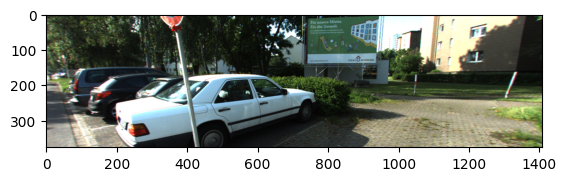

0000000070.png tensor(11.1782, device='cuda:0', dtype=torch.float64)


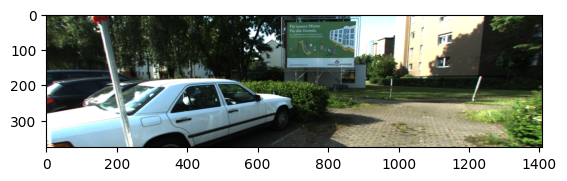

0000000065.png tensor(11.1861, device='cuda:0', dtype=torch.float64)


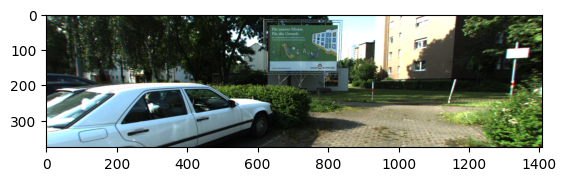

0000000060.png tensor(11.3211, device='cuda:0', dtype=torch.float64)


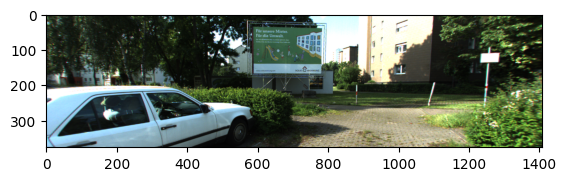

0000000055.png tensor(11.4852, device='cuda:0', dtype=torch.float64)


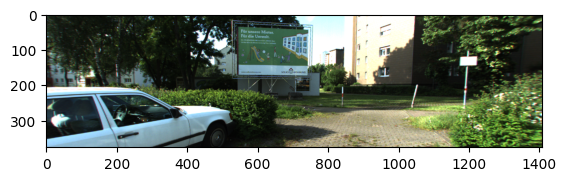

0000000050.png tensor(11.5004, device='cuda:0', dtype=torch.float64)


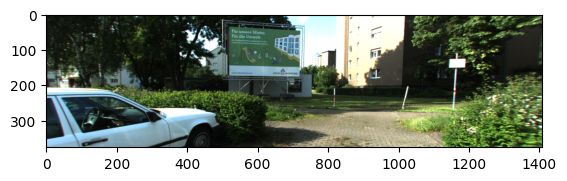

0000000035.png tensor(11.5715, device='cuda:0', dtype=torch.float64)


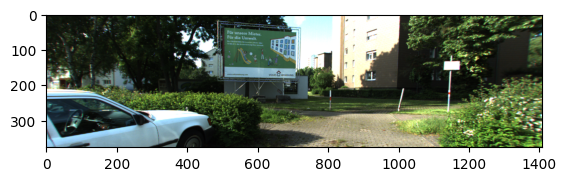

0000000040.png tensor(11.5838, device='cuda:0', dtype=torch.float64)


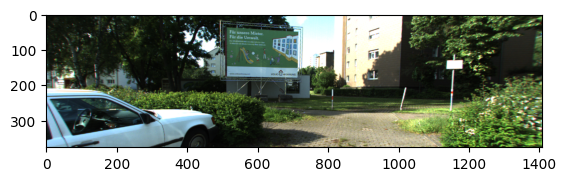

0000000045.png tensor(11.6185, device='cuda:0', dtype=torch.float64)


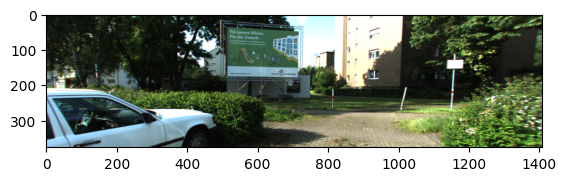

0000000030.png tensor(11.6191, device='cuda:0', dtype=torch.float64)


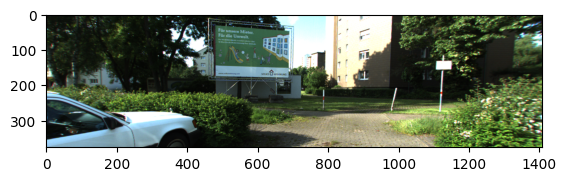

0000000015.png tensor(11.7522, device='cuda:0', dtype=torch.float64)


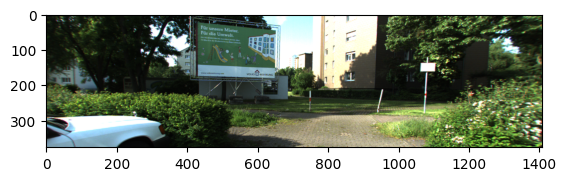

0000000025.png tensor(11.8332, device='cuda:0', dtype=torch.float64)


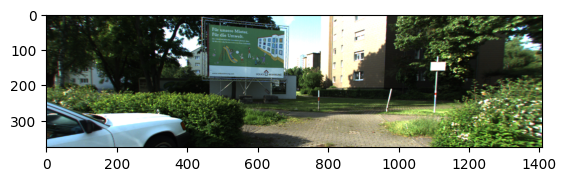

0000000020.png tensor(11.8492, device='cuda:0', dtype=torch.float64)


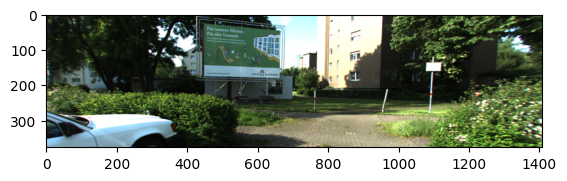

0000000000.png tensor(11.9926, device='cuda:0', dtype=torch.float64)


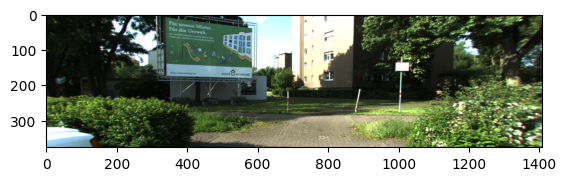

0000000005.png tensor(12.0544, device='cuda:0', dtype=torch.float64)


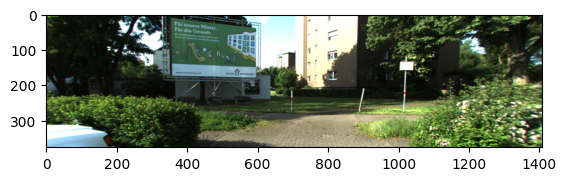

0000000010.png tensor(12.1178, device='cuda:0', dtype=torch.float64)


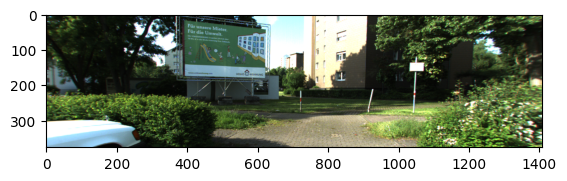

In [53]:
for i in results:
    print(i['image'], i['emd'])
    plt.imshow(plt.imread(kitti_360 + '/' + i['image']))
    plt.show()
    # time.sleep(1)
    plt.close()
    

dataset/KITTI-360/data_2d_raw\2013_05_28_drive_0010_sync\image_00\data_rect\0000000075.png 9.285158520120117


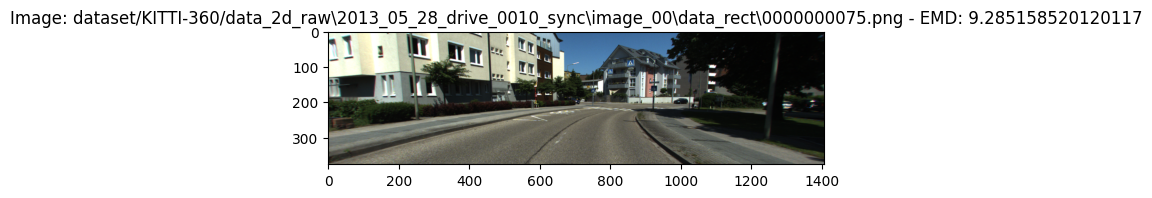

dataset/KITTI-360/data_2d_raw\2013_05_28_drive_0010_sync\image_00\data_rect\0000000090.png 9.346671660695112


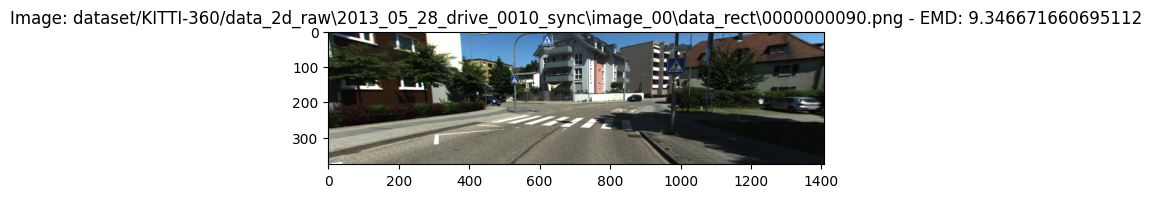

dataset/KITTI-360/data_2d_raw\2013_05_28_drive_0005_sync\image_00\data_rect\0000000005.png 11.997209489078488


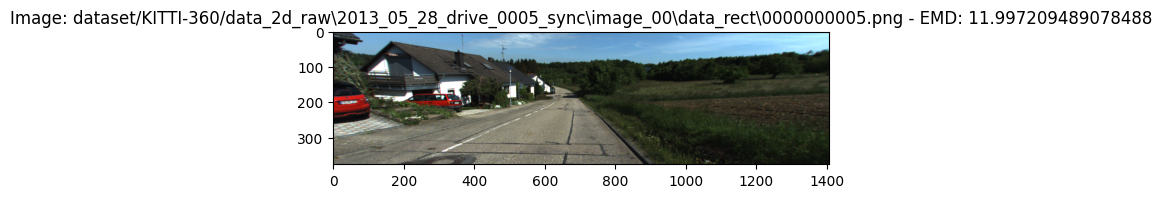

dataset/KITTI-360/data_2d_raw\2013_05_28_drive_0005_sync\image_00\data_rect\0000000010.png 12.003901096805086


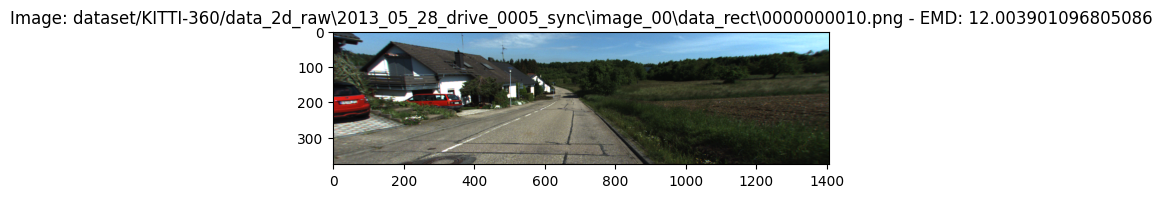

dataset/KITTI-360/data_2d_raw\2013_05_28_drive_0004_sync\image_00\data_rect\0000000095.png 16.03914965615849


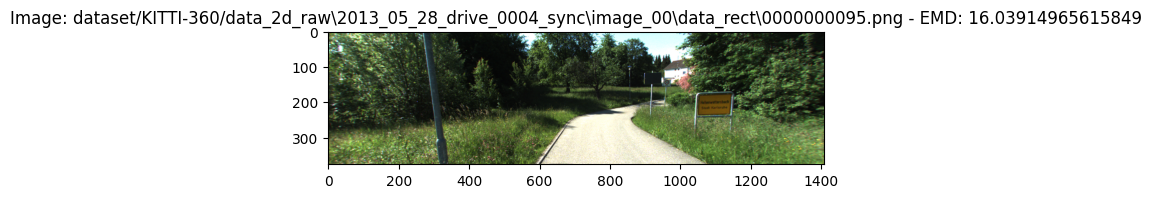

dataset/KITTI-360/data_2d_raw\2013_05_28_drive_0004_sync\image_00\data_rect\0000000090.png 16.163365702424347


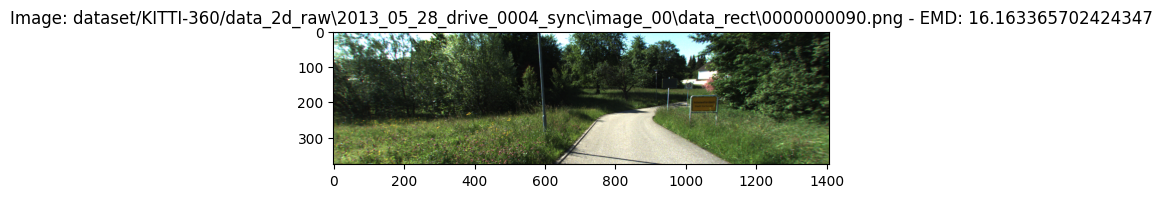

In [43]:
import json
import os
import matplotlib.pyplot as plt

# Configuration dictionary to manage paths
config = {
    "results_json_path": "output/results.json"
}

# Load the results from the JSON file
results_json_path = config["results_json_path"]
with open(results_json_path, 'r') as json_file:
    results = json.load(json_file)

# Sort results by EMD value
results = sorted(results, key=lambda x: x['emd'])

# Calculate indices for top 2, middle 2, and bottom 2
n = len(results)
top_2 = results[:2]
middle_2_start = max((n // 2) - 1, 0)
middle_2 = results[middle_2_start:middle_2_start + 2]
bottom_2 = results[-2:]

# Combine the selected images
selected_images = top_2 + middle_2 + bottom_2

# Display the selected images
for i in selected_images:
    print(i['image'], i['emd'])
    img = plt.imread(i['image'])  # Directly using the path from the JSON
    plt.imshow(img)
    plt.title(f"Image: {i['image']} - EMD: {i['emd']}")
    plt.show()
    plt.close()


0000000090.png tensor(10.1945, device='cuda:0', dtype=torch.float64)


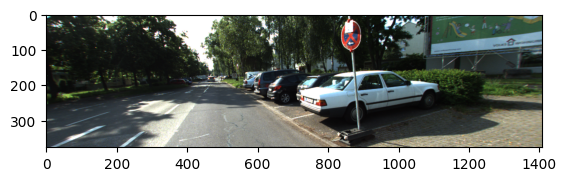

0000000055.png tensor(11.4852, device='cuda:0', dtype=torch.float64)


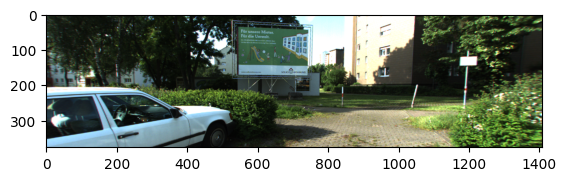

0000000010.png tensor(12.1178, device='cuda:0', dtype=torch.float64)


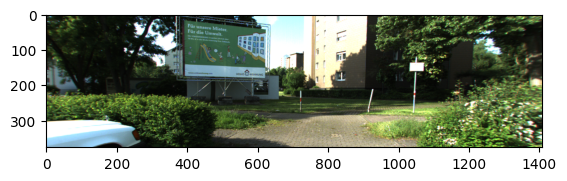

In [55]:
# Assuming results is a list of dictionaries with keys 'image' and 'emd'
n = len(results)

# Calculate indices for top 5, middle 5, and bottom 5
top_5 = results[:1]
middle_5_start = max((n // 2) - 2, 0)
middle_5 = results[middle_5_start:middle_5_start + 1]
bottom_5 = results[-1:]

# Combine the selected images
selected_images = top_5 + middle_5 + bottom_5

# Display the selected images
for i in selected_images:
    print(i['image'], i['emd'])
    plt.imshow(plt.imread(os.path.join(kitti_360, i['image'])))
    plt.show()
    plt.close()